# Learning and Decision Making

## Laboratory 1: Markov chains

In the end of the lab, you should export the notebook to a Python script (File >> Download as >> Python (.py)). Your file should be named `padi-lab1-groupXX.py`, where the `XX` corresponds to your group number and should be submitted to the e-mail <adi.tecnico@gmail.com>. 

Make sure...

* **... that the subject is of the form `[<group n.>] LAB <lab n.>`.** 

* **... to strictly respect the specifications in each activity, in terms of the intended inputs, outputs and naming conventions.** 

In particular, after completing the activities you should be able to replicate the examples provided (although this, in itself, is no guarantee that the activities are correctly completed).

### 1. The Markov chain model

Consider once again the shuttle modeling problem described in the Homework and for which you wrote a Markov chain model:

<img src="shuttle.png" width="800px">

Recall that your chain should describe the motion of the single shuttle traveling the network, where: 

* All stops are considered similar, in terms of shuttle behavior;
* At each moment, there is a single shuttle traversing the city;
* When at I.S.T. TagusPark, the shuttle will go directly to Sete Rios with a probability of 70%, and to Oeiras with a 30% probability. Similarly, when at Sete Rios, the shuttle will go directly to I.S.T. Alameda with a 50% probability, and through Praça de Londres with a 50% probability.

In this first activity, you will implement your Markov chain model in Python. You should label the different shuttle stops as `'0'`, `'1'`, `'2'`, `'3'`, `'4'` (note that these are strings), from left to right in the diagram above. For example, "I.S.T. TagusPark" corresponds to `'0'`, while "Praça de Londres" corresponds to `'3'`.

---

#### Activity 1.        

Write a function named `load_chain` that receives **no input arguments** and returns, as output, a two-element tuple corresponding to the Markov chain, where:

* ... the first element is a tuple containing an enumeration of the state-space (i.e., each element of the tuple corresponds to a state of the chain, represented as a string).
* ... the second element is a `numpy` array corresponding to the transition probability matrix for the chain.

**Note**: Don't forget to import `numpy`.

---

In [16]:
import numpy as np
import random as rd

In [82]:
# Add your code here.
def load_chain():
    stateSpace = ("0","1","2","3","4")
    transition = np.array([[0,0.3,0.7,0,0], [0,0,1,0,0], [0,0,0,0.5,0.5], [0,0,0,0,1], [1,0,0,0,0]])
    return (stateSpace, transition)

M = load_chain()

In [18]:
## Sanity Check
print('Number of states:', len(M[0]))
print('Type of states:', type(M[0][0]))
print('\nTransition probability matrix (type):', type(M[1]))
print('Transition probability matrix (dimension):', M[1].shape)

Number of states: 5
Type of states: <class 'str'>

Transition probability matrix (type): <class 'numpy.ndarray'>
Transition probability matrix (dimension): (5, 5)


We provide below an example of application of the function, that you can use as a first "sanity check" for your code. Note, however, that the fact that you can replicate the examples below is not indicative that your code is correct.

```python
print('Number of states:', len(M[0]))
print('Type of states:', type(M[0][0]))
print('\nTransition probability matrix (type):', type(M[1]))
print('Transition probability matrix (dimension):', M[1].shape)
```

Output:
```
Number of states: 5
Type of states: <class 'str'>

Transition probability matrix (type): <class 'numpy.ndarray'>
Transition probability matrix (dimension): (5, 5)
 ```

In the next activity, you will use the Markov chain model to evaluate the likelihood of any given path for the bot.

---

#### Activity 2.

Write a function `prob_trajectory` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a trajectory, corresponding to a sequence of states (i.e., a tuple or list of strings, each string corresponding to a state).

Your function should return, as output, a floating point number corresponding to the probability of observing the provided trajectory, taking the first state in the trajectory as initial state. 

---

In [19]:
# Add your code here.
def prob_trajectory(chain, trajectory):
    res = 1;
    previousStep = int(trajectory[0])
    for iStep in range(1, len(trajectory)):
        step = int(trajectory[iStep])
        res *= chain[1][previousStep][step]
        previousStep = step

    return res;



In [20]:
#Sanity Check
print('Prob. of trajectory (1, 2, 3):', prob_trajectory(M, ('1', '2', '3')))
print('Prob. of trajectory (4, 0, 1, 2, 3):', prob_trajectory(M, ('4', '0', '1', '2', '3')))
print('Prob. of trajectory (4, 0, 4):', prob_trajectory(M, ('4', '0', '4')))
print('Prob. of trajectory (0, 2, 4):', prob_trajectory(M, ('0', '2', '4')))


Prob. of trajectory (1, 2, 3): 0.5
Prob. of trajectory (4, 0, 1, 2, 3): 0.15
Prob. of trajectory (4, 0, 4): 0.0
Prob. of trajectory (0, 2, 4): 0.35


Example of application of the function with the chain $M$ from Activity 1.

```python
print('Prob. of trajectory (1, 2, 3):', prob_trajectory(M, ('1', '2', '3')))
print('Prob. of trajectory (4, 0, 1, 2, 3):', prob_trajectory(M, ('4', '0', '1', '2', '3')))
print('Prob. of trajectory (4, 0, 4):', prob_trajectory(M, ('4', '0', '4')))
print('Prob. of trajectory (0, 2, 4):', prob_trajectory(M, ('0', '2', '4')))
```

Output:
```
Prob. of trajectory (1, 2, 3): 0.5
Prob. of trajectory (4, 0, 1, 2, 3): 0.15
Prob. of trajectory (4, 0, 4): 0.0
Prob. of trajectory (0, 2, 4): 0.35
```

Note that your function should work with **any** Markov chain that is specified as a tuple like the one from Activity 1.

### 2. Stability

The next activities explore the notion of *stationary distribution* for the chain, a central concept in the the PageRank algorithm.

---

#### Activity 3

Write a function `stationary_dist` that receives, as input, a Markov chain in the form of a tuple like the one returned by the function in Activity 1. Your function should return, as output, a `numpy` array corresponding to a row vector containing the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [91]:
# Add your code here.
def stationary_dist(chain):
    values, vectors= np.linalg.eig(np.transpose(chain[1])) # Get left eigen values
    #valuesCloseOne = [np.abs(v -1) for v in values] # Calculate distance from eigen values to 1
    valuesCloseOne = []
    for v in values:
        valuesCloseOne.append(np.abs(v -1))
    dist = vectors[:,np.argmin(valuesCloseOne)].real # Get not normalized distribution from the value that is closer to 1
    return dist.T/np.sum(dist.T) #Normalizing Distribution

In [92]:
#Sanity Check
u_star = stationary_dist(M)

print('Stationary distribution:')
print(u_star)

u_prime = u_star.dot(M[1])

print('\nIs u* * P = u*?', np.all(np.isclose(u_prime, u_star)))

Stationary distribution:
[0.26315789 0.07894737 0.26315789 0.13157895 0.26315789]

Is u* * P = u*? True


Example of application of the function with the chain $M$ from Activity 1.

```python
u_star = stationary_dist(M)

print('Stationary distribution:')
print(u_star)

u_prime = u_star.dot(M[1])

print('\nIs u* * P = u*?', np.all(np.isclose(u_prime, u_star)))
```

Output:
```
Stationary distribution:
[0.263 0.079 0.263 0.132 0.263]

Is u* * P = u*? True
```

All numbers above have been rounded to 3 decimal cases. You **should not** round your results, but can use the numbers above as a comparison.

To complement Activity 3, you will now empirically establish that the chain is ergodic, i.e., no matter where the bot starts, its visitation frequency will eventually converge to the stationary distribution.

---

#### Activity 4.

Write a function `compute_dist` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a row vector (a numpy array) corresponding to the initial distribution for the chain;
* ... an integer $N$, corresponding to the number of steps that the bot is expected to take.

Your function should return, as output, a row vector (a `numpy` array) containing the distribution after $N$ steps of the chain.

---

In [93]:
# Add your code here.
def compute_dist(chain, initDist, nStep):
    return initDist.dot(np.linalg.matrix_power(chain[1],nStep))

In [24]:
#Sanity Check
# Number of states
nS = len(M[0])

# Initial, uniform distribution
u = np.ones((1, nS)) / nS

# Distrbution after 100 steps
v = compute_dist(M, u, 10)
print('\nIs u * P^10 = u*?', np.all(np.isclose(v, u_star)))

# Distrbution after 1000 steps
v = compute_dist(M, u, 100)
print('\nIs u * P^100 = u*?', np.all(np.isclose(v, u_star)))


Is u * P^10 = u*? False

Is u * P^100 = u*? True


Example of application of the function with the chain $M$ from Activity 1.

```python
# Number of states
nS = len(M[0])

# Initial, uniform distribution
u = np.ones((1, nS)) / nS

# Distrbution after 100 steps
v = compute_dist(M, u, 10)
print('\nIs u * P^10 = u*?', np.all(np.isclose(v, u_star)))

# Distrbution after 1000 steps
v = compute_dist(M, u, 100)
print('\nIs u * P^100 = u*?', np.all(np.isclose(v, u_star)))
```

Output:
```
Is u * P^10 = u*? False

Is u * P^100 = u*? True
```

Is the chain ergodic? Justify, based on the results above.

<span style="color:blue">_Add your answer here:_</span> We can conclude this chain is ergodic since for a high value of t (time step) it converges to the stationary distribution calculated above.

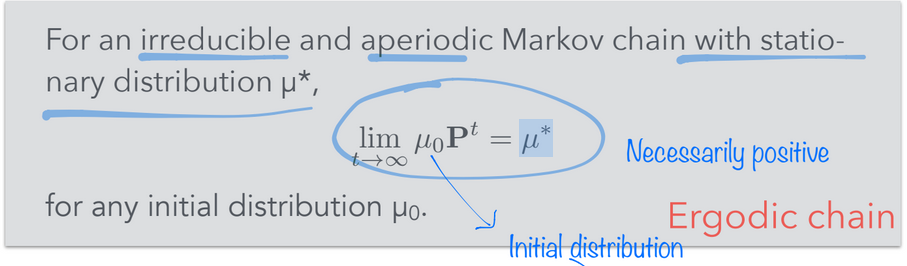

### 3. Simulation

In this part of the lab, you will *simulate* the actual bot, and empirically compute the visitation frequency of each state.

---

#### Activity 5

Write down a function `simulate` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a row vector (a `numpy` array) corresponding to the initial distribution for the chain;
* ... an integer $N$, corresponding to the number of steps that the bot is expected to take.

Your function should return, as output, a tuple containing a trajectory of $N$ steps obtained from the initial distribution provided. Each element in the tuple should be a string corresponding to a state index.

---

**Note:** You may find useful to import the numpy module `numpy.random`.

In [94]:
import numpy.random as rnd

# Add your code here.
def simulate(chain, rowInitDist, nSteps):
    trajectory =  []
    dist = rowInitDist[0];
    for i in range(nSteps):
        trajectory += rnd.choice(list(chain[0]),p=dist)
        dist = chain[1][int(trajectory[-1])]
    return tuple(trajectory)


In [95]:
#Sanity Check
# Number of states
nS = len(M[0])

# Initial, uniform distribution
u = np.ones((1, nS)) / nS

np.random.seed(42)

# Simulate short trajectory
traj = simulate(M, u, 10)
print(traj)

# Simulate a long trajectory
traj = simulate(M, u, 10000)

('1', '2', '4', '0', '1', '2', '3', '4', '0', '2')


Example of application of the function with the chain $M$ from Activity 1.

```python
# Number of states
nS = len(M[0])

# Initial, uniform distribution
u = np.ones((1, nS)) / nS

np.random.seed(42)

# Simulate short trajectory
traj = simulate(M, u, 10)
print(traj)

# Simulate a long trajectory
traj = simulate(M, u, 10000)
```

Output:
```
('1', '2', '4', '0', '1', '2', '3', '4', '0', '2')
```

Note that, even if the seed is fixed, it is possible that your trajectories are slightly different.

---

#### Activity 6

Draw a histogram of the $10,000$-step trajectory generated in the example of Activity #5 using the function `hist` from the module `matplotlib.pyplot`. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #3.

**Note**: Don't forget to load `matplotlib`. 

**Note 2**: Recall that the states in the trajectory from Activity #5 consist of strings, which should be converted to state indices to match the entries in the distribution computed in Activity #3.

---

Stationary Distribution calculated in activity 3: [0.26315789 0.07894737 0.26315789 0.13157895 0.26315789]
Observed relative frequencies: [0.2625, 0.08, 0.2625, 0.1325, 0.2625]
Is the stationary distribution close to the observed relative frequencies? True


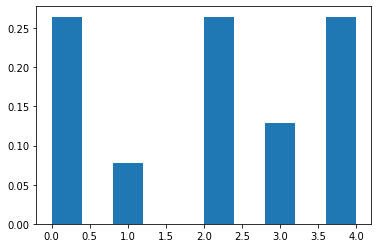

In [215]:
# Add your code here.
import matplotlib.pyplot as plt

nSteps = 10000
chain = load_chain()
traj = simulate(chain, u, nSteps)
distAct3 = stationary_dist(chain)

trajs = []
for i in traj:
    trajs.append(int(i))
    
# Plotting histogram
weights = np.ones_like(trajs) / nSteps
plt.hist(trajs, weights=weights)

absFrequencies = dict(zip(unique, counts))
#relFrequencies = [absFrequencies[str(i)]/nSteps for i in range(nStates)]
relFrequencies = []
for i in range(nStates):
    relFrequencies.append(absFrequencies[str(i)]/nSteps)
    
    
# Compare Distributions
print("Stationary Distribution calculated in activity 3: {}".format(distAct3))
print("Observed relative frequencies: {}".format(relFrequencies))
print('Is the stationary distribution close to the observed relative frequencies?', np.all(np.isclose(distAct3, relFrequencies,atol=0.01)))


In [217]:
#Sanity Check
print("Do the observed relative frequencies sum up to 1? {}".format(np.sum(relFrequencies)==1))

Do the observed relative frequencies sum up to 1? True
